In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
os.getcwd()
os.chdir('/Users/susovan/Desktop/springboard doc')
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Data Loading
df = pd.read_csv('datasets_666204_1173952_Walmart_Store_sales.csv')


In [3]:
#Data Organization
#os.mkdir('Walmart Sales Project')

In [4]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [5]:

values_to_remove = [1611968.17,1409727.59 ,42.31,64.88]

In [6]:
df_sub = df.applymap(lambda x:np.nan if x in values_to_remove else x)

In [7]:
df_sub

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,NaN,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,NaN,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,NaN,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,NaN,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [8]:
#Data Definition
df_sub.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [9]:
df_sub.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [11]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6433 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6431 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [12]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [13]:
df_sub.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.433000e+03,6435.000000,6431.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046821e+06,0.069930,60.668179,3.358607,171.578394,7.999151
std,12.988182,5.643922e+05,0.255049,18.447679,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.529853e+05,0.000000,47.500000,2.933000,131.735000,6.891000
50%,23.000000,9.604761e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.419912e+06,0.000000,74.950000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [14]:
df.isnull().values.any() 

False

In [15]:
df_sub.isnull().values.any() 

True

In [16]:
a=df.nunique()
a

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [17]:
b= df_sub.nunique()
b

Store             45
Date             143
Weekly_Sales    6433
Holiday_Flag       2
Temperature     3526
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [18]:
#percent of unique values per column
pd.DataFrame(a/len(df) * 100,columns = ['percent'])

,percent
Store,0.699301
Date,2.222222
Weekly_Sales,100.000000
Holiday_Flag,0.031080
Temperature,54.825175
Fuel_Price,13.861694
CPI,33.333333
Unemployment,5.423465


In [19]:
pd.DataFrame(b/len(df) * 100,columns = ['percent'])

,percent
Store,0.699301
Date,2.222222
Weekly_Sales,99.968920
Holiday_Flag,0.031080
Temperature,54.794095
Fuel_Price,13.861694
CPI,33.333333
Unemployment,5.423465


In [20]:
df['Weekly_Sales'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64>

In [21]:
df_sub['Weekly_Sales'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1643690.90
1       1641957.44
2              NaN
3              NaN
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64>

In [22]:
df['Temperature'].value_counts

<bound method IndexOpsMixin.value_counts of 0       42.31
1       38.51
2       39.93
3       46.63
4       46.50
        ...  
6430    64.88
6431    64.89
6432    54.47
6433    56.47
6434    58.85
Name: Temperature, Length: 6435, dtype: float64>

In [23]:
df_sub['Temperature'].value_counts

<bound method IndexOpsMixin.value_counts of 0         NaN
1       38.51
2       39.93
3       46.63
4       46.50
        ...  
6430      NaN
6431    64.89
6432    54.47
6433    56.47
6434    58.85
Name: Temperature, Length: 6435, dtype: float64>

In [24]:
nas=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent


In [25]:
nas=pd.DataFrame(df_sub.isnull().sum().sort_values(ascending=False)/len(df_sub),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
Temperature,0.000622
Weekly_Sales,0.000311


In [26]:
df_sub['Temperature'].fillna((df_sub['Temperature'].bfill()), inplace=True)

In [27]:
df_sub

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,38.51,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,NaN,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,NaN,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.89,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [28]:
df_sub['Weekly_Sales'].fillna((df_sub['Weekly_Sales'].ffill()), inplace=True)

In [29]:
df_sub

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,38.51,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1641957.44,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1641957.44,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.89,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [30]:
df_sub.isnull().values.any()

False

In [31]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


In [32]:
duplicateRowsDF = df_sub[df_sub.duplicated()]
duplicateRowsDF

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


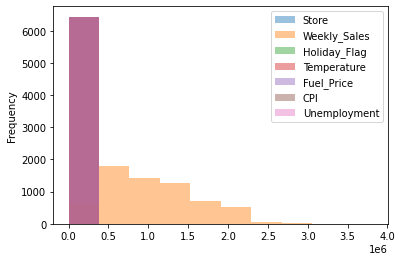

In [33]:
_ = df.plot.hist(bins=10, alpha=0.45)

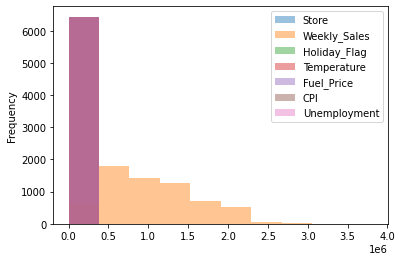

In [34]:
_ = df_sub.plot.hist(bins=10, alpha=0.45)

Text(0, 0.5, 'count of stores')

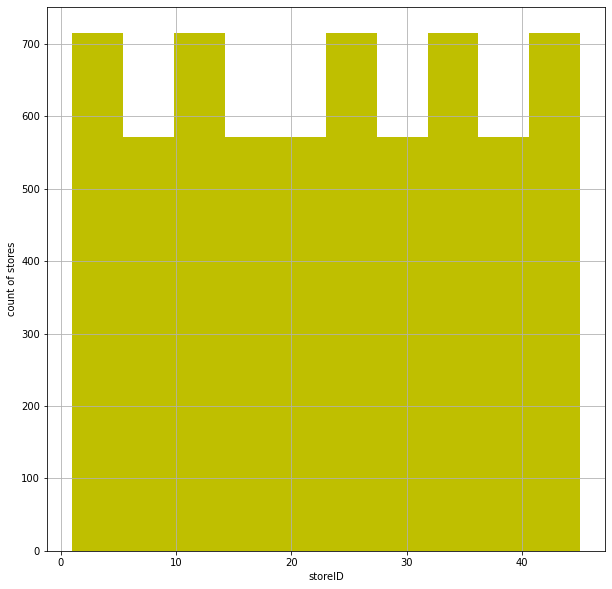

In [35]:
df['Store'].hist(bins=10,figsize =(10,10), color='y')
plt.xlabel('storeID')
plt.ylabel('count of stores')

Text(0, 0.5, 'values')

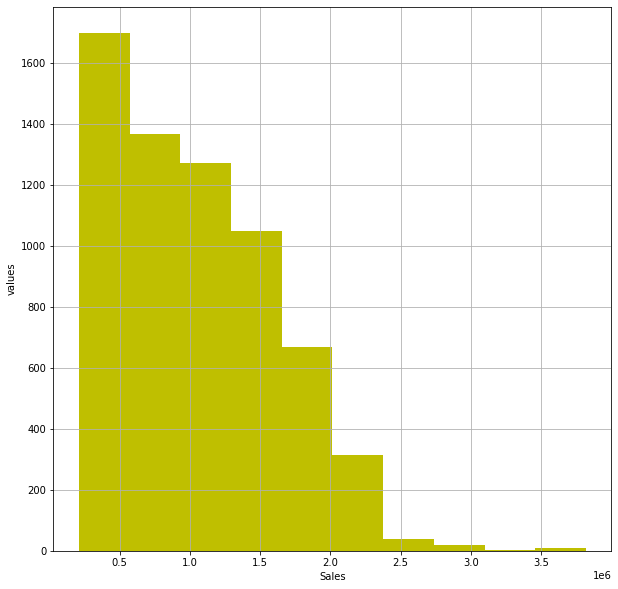

In [36]:
df['Weekly_Sales'].hist(bins=10,figsize =(10,10), color='y')
plt.xlabel('Sales')
plt.ylabel('values')

Text(0, 0.5, 'values')

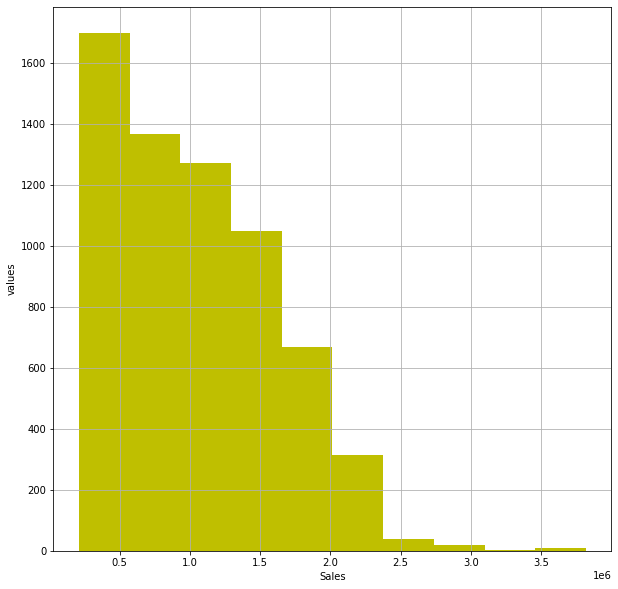

In [37]:
df_sub['Weekly_Sales'].hist(bins=10,figsize =(10,10), color='y')
plt.xlabel('Sales')
plt.ylabel('values')

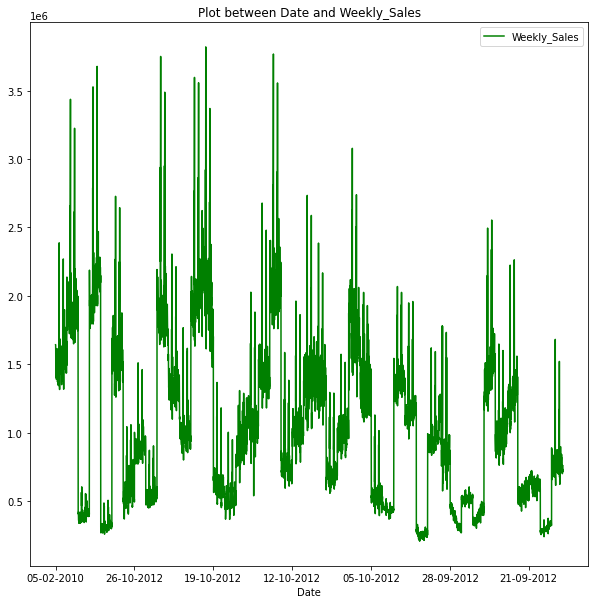

In [38]:
df.plot(x='Date', y='Weekly_Sales', title= "Plot between Date and Weekly_Sales",figsize =(10,10), color='g');

plt.show(True);

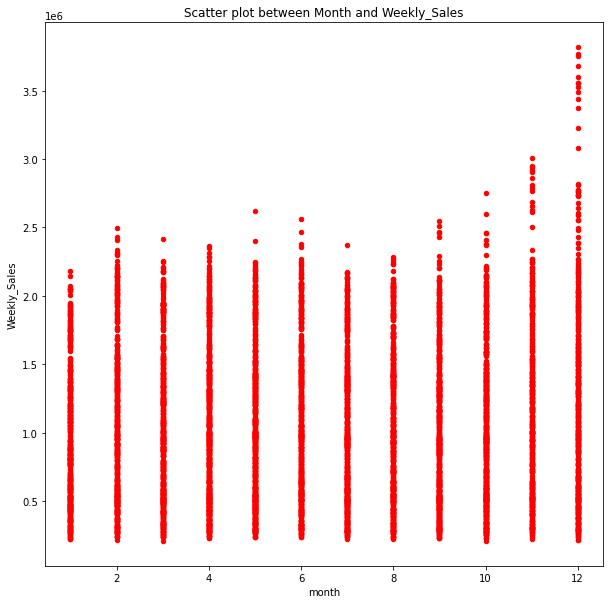

In [39]:
#monthly sales 
df_sub['month'] = pd.DatetimeIndex(df_sub['Date']).month

df_sub.plot.scatter(x='month', y='Weekly_Sales', title= "Scatter plot between Month and Weekly_Sales",figsize =(10,10), color='r');

plt.show(True);

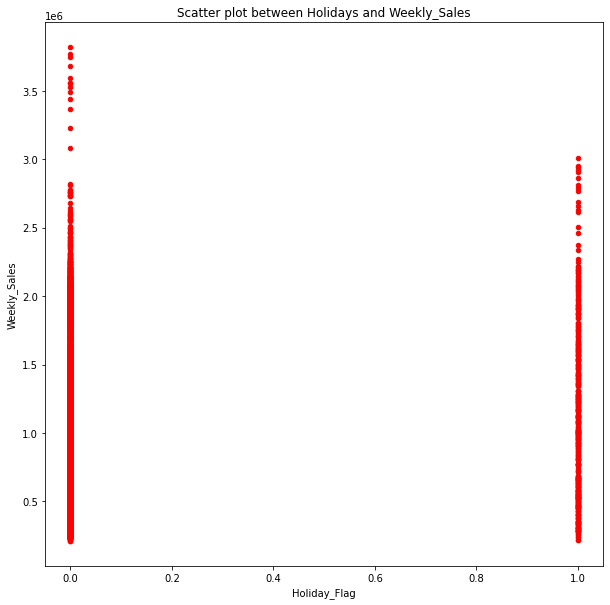

In [40]:
df.plot.scatter(x='Holiday_Flag', y='Weekly_Sales', title= "Scatter plot between Holidays and Weekly_Sales",figsize =(10,10), color='r');

plt.show(True);

Text(0, 0.5, 'counts')

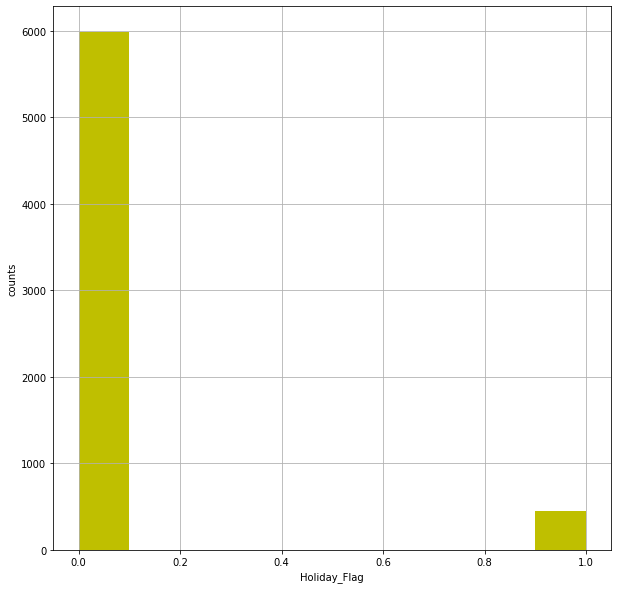

In [41]:
df_sub['Holiday_Flag'].hist(bins=10,figsize =(10,10), color='y')
plt.xlabel('Holiday_Flag')
plt.ylabel('counts')

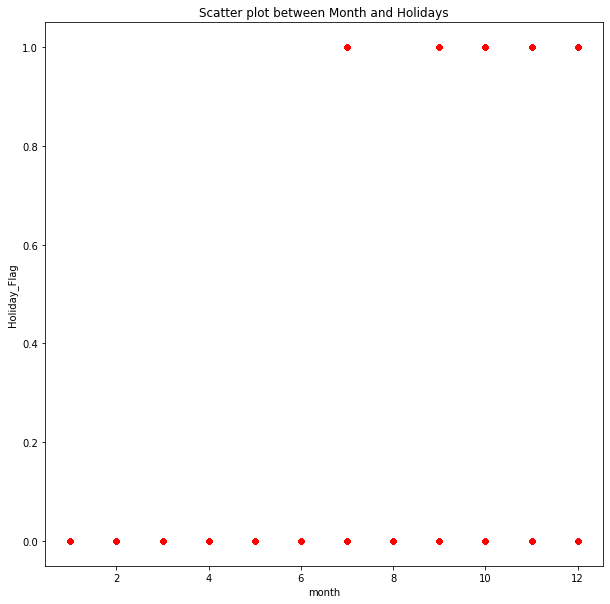

In [42]:
df['month'] = pd.DatetimeIndex(df['Date']).month
df.plot.scatter(x='month', y='Holiday_Flag', title= "Scatter plot between Month and Holidays",figsize =(10,10), color='r');

plt.show(True);

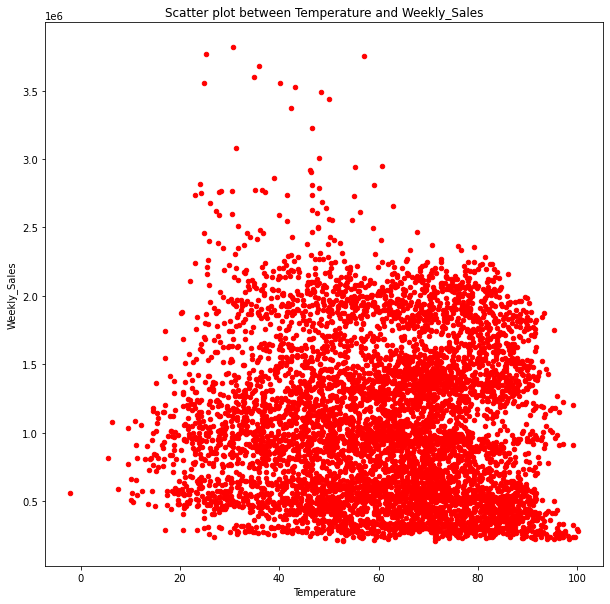

In [43]:
df.plot.scatter(x='Temperature', y='Weekly_Sales', title= "Scatter plot between Temperature and Weekly_Sales",figsize =(10,10), color='r');

plt.show(True);

Text(0, 0.5, 'counts')

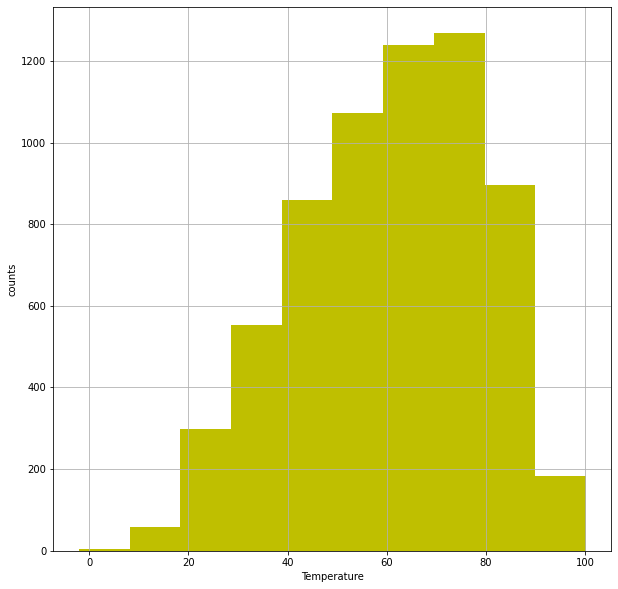

In [44]:
df_sub['Temperature'].hist(bins=10,figsize =(10,10), color='y')
plt.xlabel('Temperature')
plt.ylabel('counts')

Text(0, 0.5, 'counts')

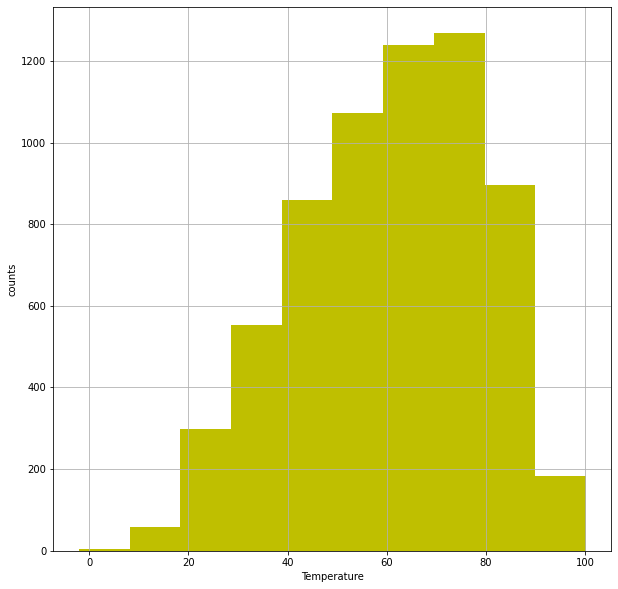

In [45]:
df['Temperature'].hist(bins=10,figsize =(10,10), color='y')
plt.xlabel('Temperature')
plt.ylabel('counts')

Text(0, 0.5, 'counts')

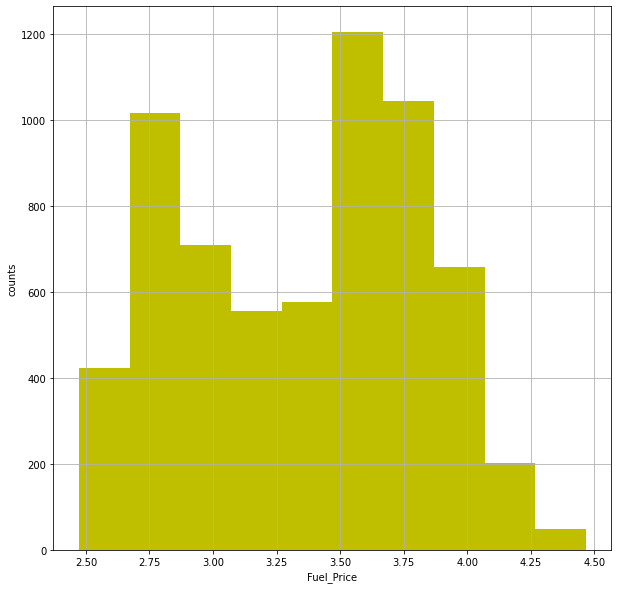

In [46]:
df['Fuel_Price'].hist(bins=10,figsize =(10,10), color='y')
plt.xlabel('Fuel_Price')
plt.ylabel('counts')

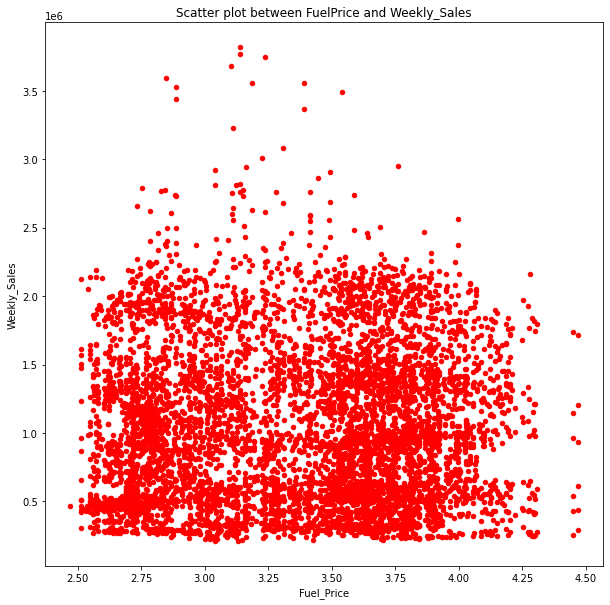

In [47]:
df.plot.scatter(x='Fuel_Price', y='Weekly_Sales', title= "Scatter plot between FuelPrice and Weekly_Sales", color='r', figsize =(10,10));

plt.show(True);

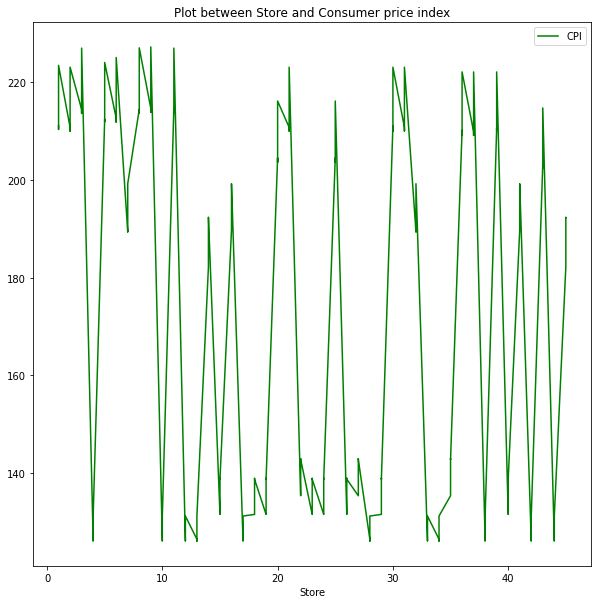

In [48]:
df.plot(x='Store', y='CPI', title= "Plot between Store and Consumer price index",figsize =(10,10), color='g');

plt.show(True);

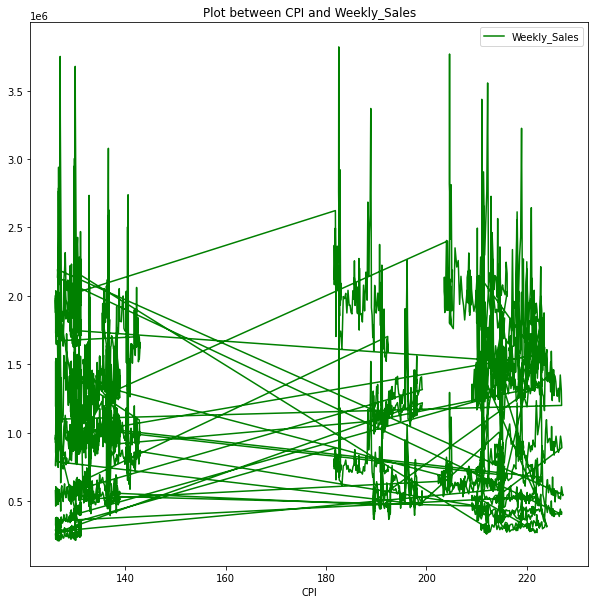

In [49]:

df.plot(y='Weekly_Sales', x='CPI', title= "Plot between CPI and Weekly_Sales",figsize =(10,10) , color='g' );

plt.show(True);

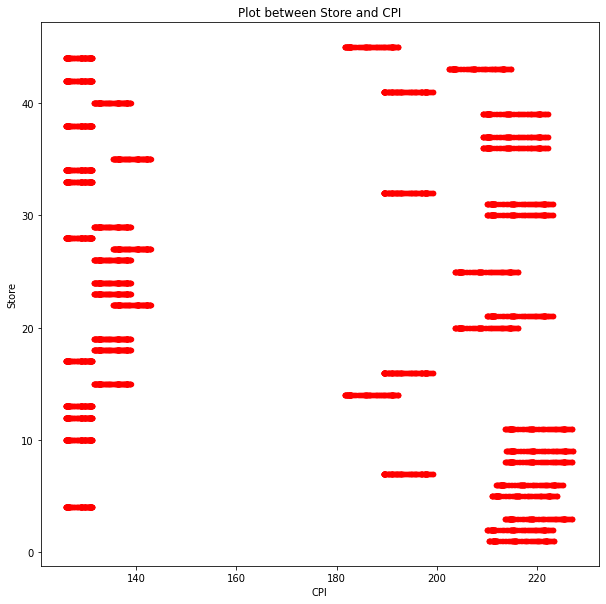

In [50]:

df.plot(kind='scatter', y='Store', x='CPI', title='Plot between Store and CPI', figsize =(10,10), color='r')

plt.show(True)

Text(0, 0.5, 'counts')

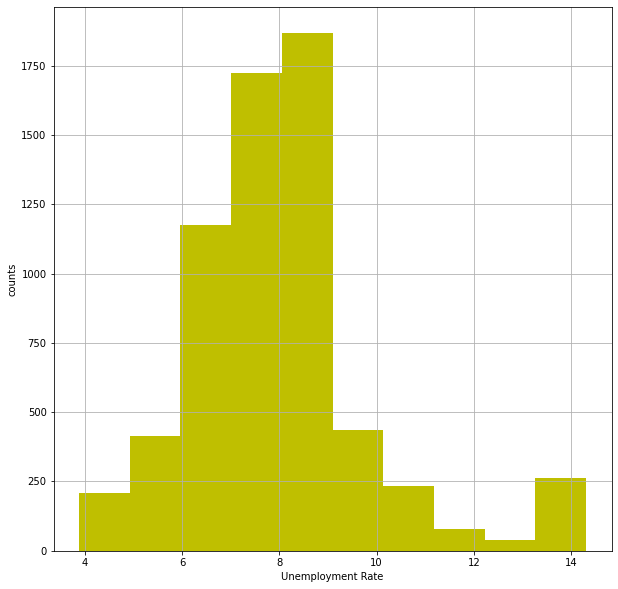

In [51]:
df['Unemployment'].hist(bins=10,figsize =(10,10), color='y')
plt.xlabel('Unemployment Rate')
plt.ylabel('counts')

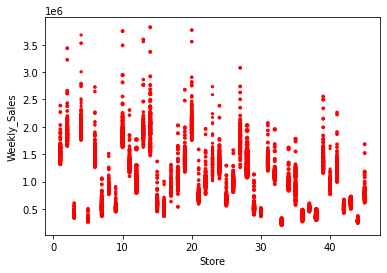

In [52]:
df.plot(kind='scatter', x='Store', y='Weekly_Sales', s=df.Unemployment, color='r')

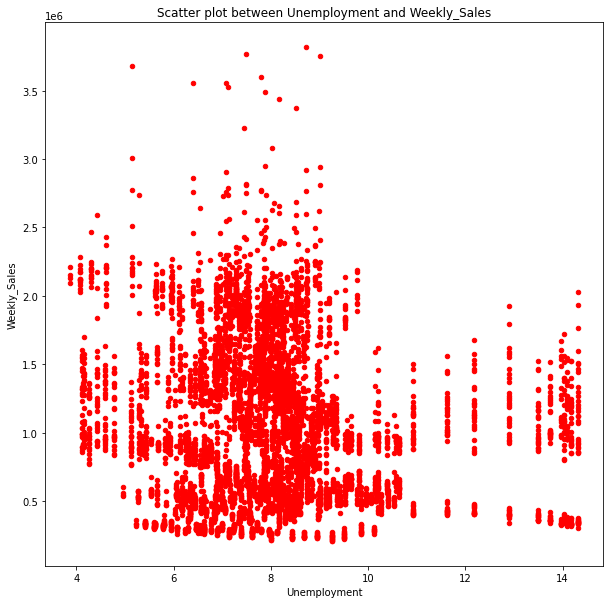

In [53]:
df.plot.scatter(x='Unemployment', y='Weekly_Sales', title= "Scatter plot between Unemployment and Weekly_Sales",figsize =(10,10), color='r');

plt.show(True);

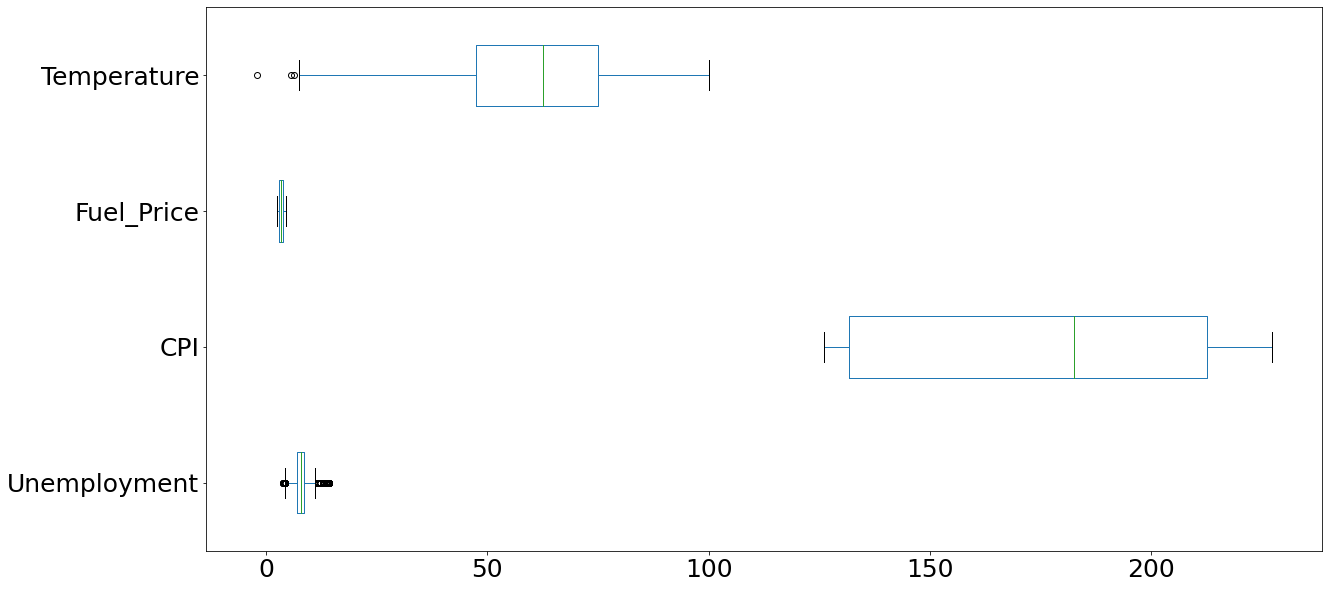

In [54]:

df_new = df[['Unemployment', 'CPI', 'Fuel_Price', 'Temperature']]
df_new
f, ax = plt.subplots(figsize=(20, 10))
df_new.boxplot(grid=False, vert=False,fontsize=25, figsize=(10,20))


In [55]:
#Apply outlier removal using the Interquartile range or replacement
Q1 = df_new.quantile(0.25)
Q3 = df_new.quantile(0.75)
IQR = Q3 - Q1
IQR


Unemployment     1.731000
CPI             81.008293
Fuel_Price       0.802000
Temperature     27.480000
dtype: float64

In [56]:
dfno = df_new[~((df_new < (Q1 - 1.5 * IQR)) |(df_new> (Q3 + 1.5 * IQR))).any(axis=1)]


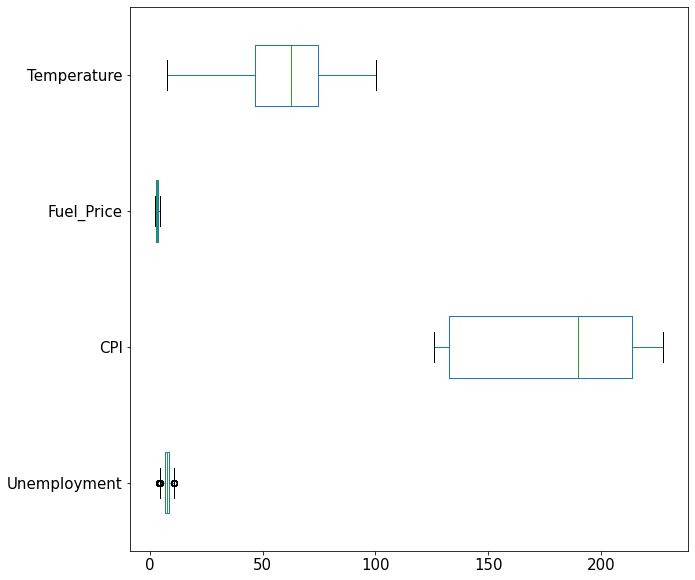

In [57]:
df_box = dfno.boxplot(grid=False, vert=False,fontsize=15, figsize=(10,10))

In [58]:
print(df.shape)
print(dfno.shape)
dfno

(6435, 9)
(5951, 4)


,Unemployment,CPI,Fuel_Price,Temperature
0,8.106,211.096358,2.572,42.31
1,8.106,211.242170,2.548,38.51
2,8.106,211.289143,2.514,39.93
3,8.106,211.319643,2.561,46.63
4,8.106,211.350143,2.625,46.50
...,...,...,...,...
6430,8.684,192.013558,3.997,64.88
6431,8.667,192.170412,3.985,64.89
6432,8.667,192.327265,4.000,54.47
6433,8.667,192.330854,3.969,56.47


Text(0, 0.5, 'values')

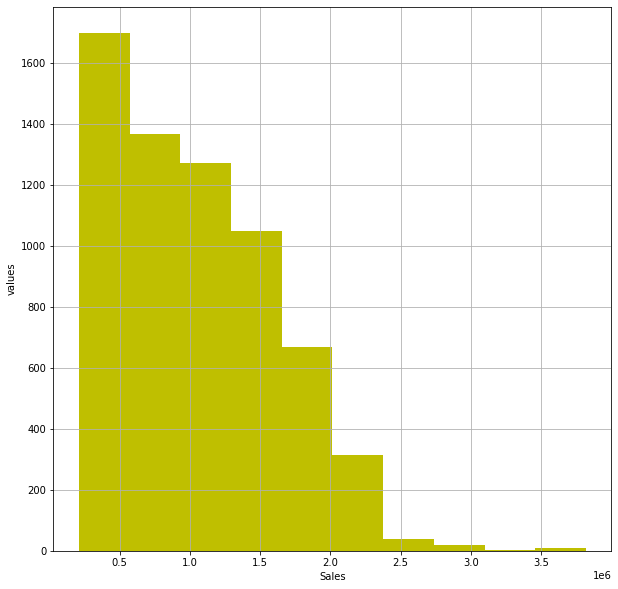

In [59]:
df['Weekly_Sales'].hist(bins=10,figsize =(10,10), color='y')
plt.xlabel('Sales')
plt.ylabel('values')

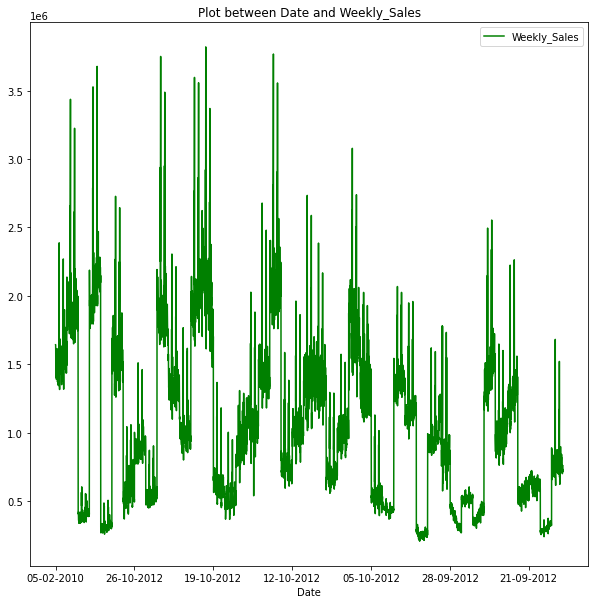

In [60]:
df.plot(x='Date', y='Weekly_Sales', title= "Plot between Date and Weekly_Sales",figsize =(10,10), color='g');

plt.show(True);


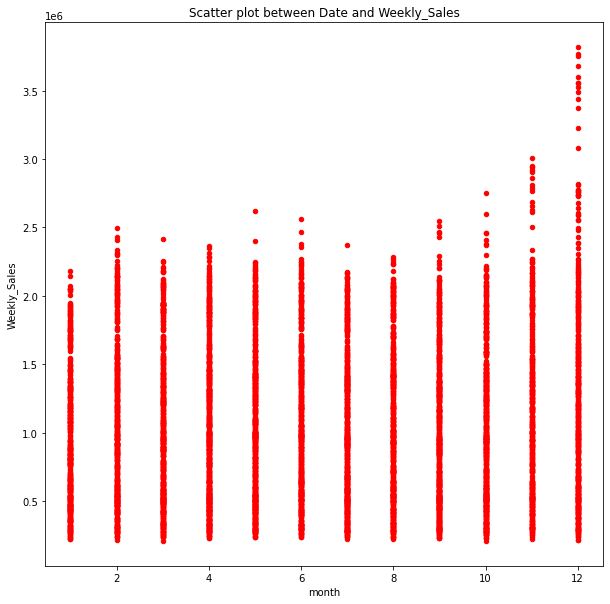

In [61]:
#monthly sales 
df['month'] = pd.DatetimeIndex(df['Date']).month

df.plot.scatter(x='month', y='Weekly_Sales', title= "Scatter plot between Date and Weekly_Sales",figsize =(10,10), color='r');

plt.show(True);

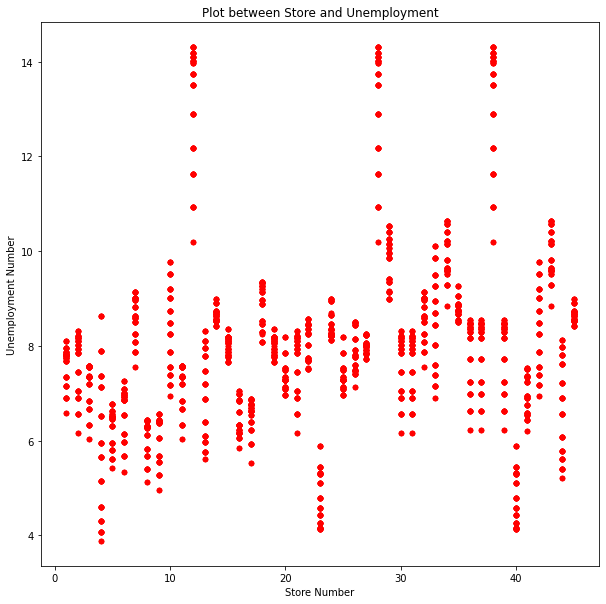

In [62]:
df.plot.scatter(x='Store', y='Unemployment', title= "Plot between Store and Unemployment", figsize =(10,10), color='r');
plt.xlabel('Store Number')
plt.ylabel('Unemployment Number')
plt.show()

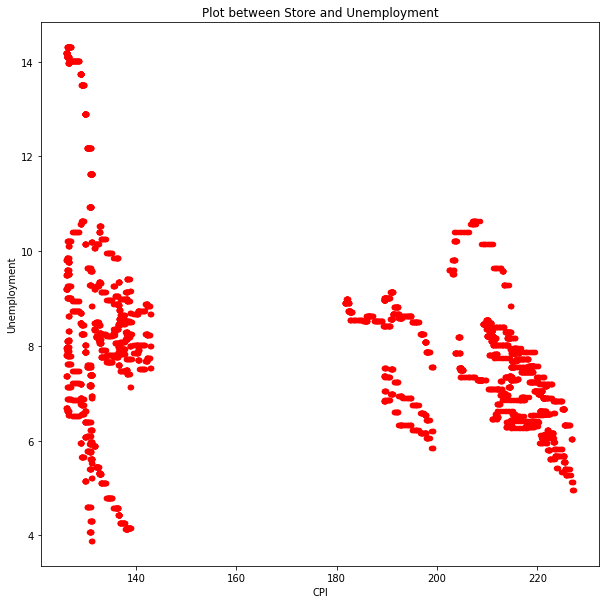

In [63]:
df.plot.scatter(x='CPI', y='Unemployment', title= "Plot between Store and Unemployment", figsize =(10,10), color='r');
plt.xlabel('CPI')
plt.ylabel('Unemployment')
plt.show()

In [64]:
df['Store'].unique()
#df.groupby(["Store"]).sum().sort_values("Weekly_Sales", ascending=False)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [65]:
#sum of weekly sales for each store -bar plot
result_group_store= df.groupby(['Store'])
total_by_store = result_group_store['Weekly_Sales'].agg([np.sum]).reset_index()
total_by_store


,Store,sum
0,1,2.224028e+08
1,2,2.753824e+08
2,3,5.758674e+07
3,4,2.995440e+08
4,5,4.547569e+07
5,6,2.237561e+08
6,7,8.159828e+07
7,8,1.299512e+08
8,9,7.778922e+07
9,10,2.716177e+08


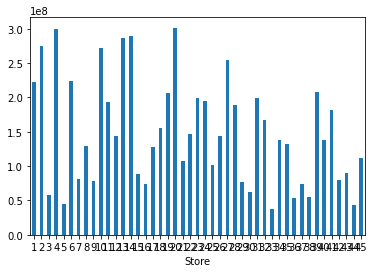

In [66]:
total_by_store.plot(kind='bar' ,x='Store',y='sum',rot=0,  legend=False)

In [67]:
#sum of weekly sales for each store -bar plot
#sns.barplot(x=df['Store'], y=df['Weekly_Sales'])
#sns.set(rc={'figure.figsize':(20,9)})

In [68]:
df['Year'] = pd.DatetimeIndex(df['Date']).year

result_group_year= df.groupby(['Year'])
total_by_year = result_group_year['Weekly_Sales'].agg([np.sum]).reset_index()
total_by_year

,Year,sum
0,2010,2.288886e+09
1,2011,2.448200e+09
2,2012,2.000133e+09


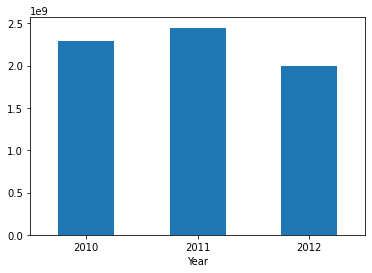

In [69]:
#sum of weekly sales year wise
total_by_year.plot(kind='bar' ,x='Year',y='sum',rot=0,  legend=False)

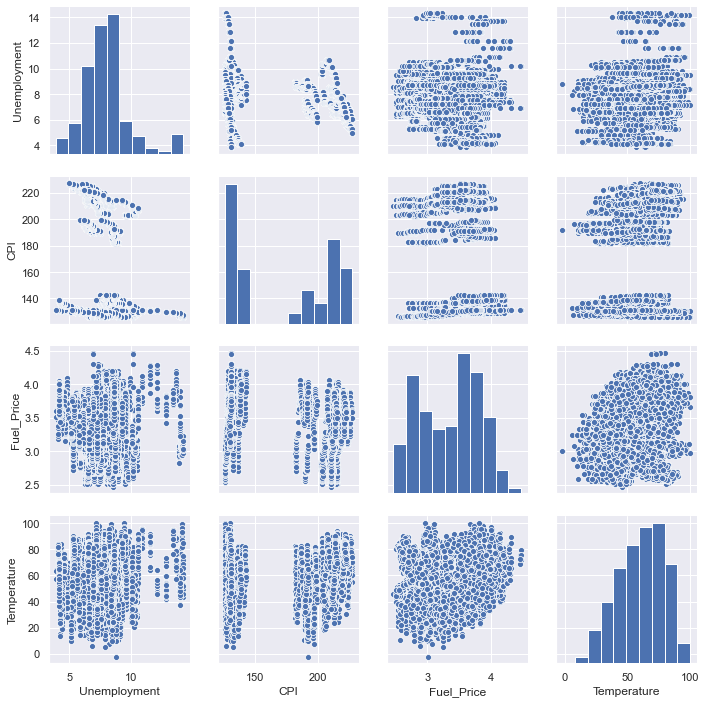

In [70]:
sns.set()
sns.pairplot(df_new)
plt.show()

Correlation between various features


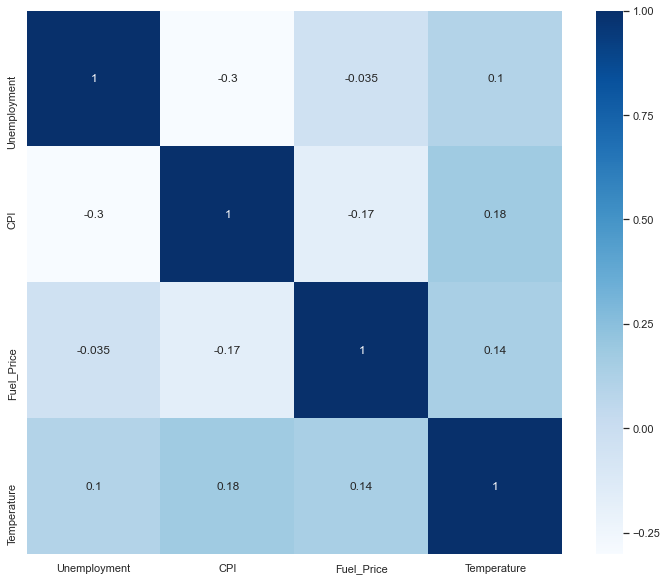

In [71]:
#Calculate the correlation coefficients
#corr = df_new.corr()
#print(corr)
#corr.isna()

#corr.round(2).style.background_gradient(cmap='coolwarm')
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(df_new.corr(), annot=True,cmap ='Blues')

In [72]:
corr_matrix = df_new.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
print(upper)

              Unemployment      CPI  Fuel_Price  Temperature
Unemployment           NaN  0.30202    0.034684     0.101158
CPI                    NaN      NaN    0.170642     0.176888
Fuel_Price             NaN      NaN         NaN     0.144982
Temperature            NaN      NaN         NaN          NaN


In [73]:
to_drop =[column for column in upper.columns if any(upper[column] > 0.70)]

print(to_drop)

[]


In [74]:
#categorical variable  to create dummy or indicator features for categorical variables
df= df.drop('month',axis=1)
#df= df.sort_values(by=['Date'])

df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,2012
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,2012
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,2012
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,2012


In [75]:
df['Year'] = pd.DatetimeIndex(df['Date']).year

df['Date'] = pd.DatetimeIndex(df['Date']).date
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Week'] = pd.DatetimeIndex(df['Date']).week
#df_new = df.drop('Date', axis=1)


df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,18
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,39
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,19
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,50
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,42


In [76]:
#Other factors except store number affecting weekly sales --Top 2 store no
df= df.sort_values(by=['Weekly_Sales'], ascending=False)
df.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.544590,8.724,2010,12,51
2763,20,2010-12-24,3766687.43,0,25.17,3.141,204.637673,7.484,2010,12,51


In [77]:
#Other factors except store number affecting weekly sales --Lowest 2 store no
df= df.sort_values(by=['Weekly_Sales'])
df.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
4619,33,2010-03-12,209986.25,0,52.82,3.041,126.731333,9.265,2010,3,10
4614,33,2010-10-29,213538.32,0,71.34,3.130,126.436419,9.265,2010,10,43


In [78]:
df_new= df.drop(['Date'],axis=1)
df_new

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
4619,33,209986.25,0,52.82,3.041,126.731333,9.265,2010,3,10
4614,33,213538.32,0,71.34,3.130,126.436419,9.265,2010,10,43
4675,33,215359.21,1,51.60,3.428,130.071032,8.010,2011,12,52
4623,33,219804.85,1,52.91,3.148,127.087677,9.265,2010,12,52
4671,33,220060.35,0,59.12,3.701,129.845967,8.010,2011,2,6
...,...,...,...,...,...,...,...,...,...,...
1762,13,3595903.20,0,34.90,2.846,126.983581,7.795,2010,12,51
527,4,3676388.98,0,35.92,3.103,129.984548,5.143,2011,12,51
1333,10,3749057.69,0,57.06,3.236,126.983581,9.003,2010,12,51
2763,20,3766687.43,0,25.17,3.141,204.637673,7.484,2010,12,51


In [79]:

dummy = pd.get_dummies(df_new['Month'])
dummy.rename(columns={1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'Jun',
                       7 : 'Jul', 8 : 'Aug', 9 : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'}, inplace=True)
dummy1 =pd.get_dummies(df_new['Year'],prefix='Year')
#dummy2 = pd.get_dummies(df_new['Week'],prefix='Week')
df_new = pd.concat([df_new, dummy1, dummy],axis=1)

df_new



,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
4619,33,209986.25,0,52.82,3.041,126.731333,9.265,2010,3,10,...,1,0,0,0,0,0,0,0,0,0
4614,33,213538.32,0,71.34,3.130,126.436419,9.265,2010,10,43,...,0,0,0,0,0,0,0,1,0,0
4675,33,215359.21,1,51.60,3.428,130.071032,8.010,2011,12,52,...,0,0,0,0,0,0,0,0,0,1
4623,33,219804.85,1,52.91,3.148,127.087677,9.265,2010,12,52,...,0,0,0,0,0,0,0,0,0,1
4671,33,220060.35,0,59.12,3.701,129.845967,8.010,2011,2,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,13,3595903.20,0,34.90,2.846,126.983581,7.795,2010,12,51,...,0,0,0,0,0,0,0,0,0,1
527,4,3676388.98,0,35.92,3.103,129.984548,5.143,2011,12,51,...,0,0,0,0,0,0,0,0,0,1
1333,10,3749057.69,0,57.06,3.236,126.983581,9.003,2010,12,51,...,0,0,0,0,0,0,0,0,0,1
2763,20,3766687.43,0,25.17,3.141,204.637673,7.484,2010,12,51,...,0,0,0,0,0,0,0,0,0,1


In [80]:
X=df_new.drop(['Weekly_Sales','Year', 'Month'],axis=1)
X.columns


Index(['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Week', 'Year_2010', 'Year_2011', 'Year_2012', 'Jan',
       'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov',
       'Dec'],
      dtype='object')

In [81]:
#X=df_new[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year' , 'Month']]
y=df_new[['Weekly_Sales']]
y


,Weekly_Sales
4619,209986.25
4614,213538.32
4675,215359.21
4623,219804.85
4671,220060.35
...,...
1762,3595903.20
527,3676388.98
1333,3749057.69
2763,3766687.43


In [82]:
X.shape

(6435, 22)

In [83]:
y.shape


(6435, 1)

In [84]:
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X)
#X_test_scaled=scaler.transform(X_test)
X_scaled

array([[ 0.7699905 , -0.27420425, -0.4252871 , ..., -0.31622777,
        -0.25916053, -0.28867513],
       [ 0.7699905 , -0.27420425,  0.57886072, ...,  3.16227766,
        -0.25916053, -0.28867513],
       [ 0.7699905 ,  3.64691651, -0.49143506, ..., -0.31622777,
        -0.25916053,  3.46410162],
       ...,
       [-1.00098765, -0.27420425, -0.1953958 , ..., -0.31622777,
        -0.25916053,  3.46410162],
       [-0.23099715, -0.27420425, -1.92446028, ..., -0.31622777,
        -0.25916053,  3.46410162],
       [-0.69299145, -0.27420425, -1.6305898 , ..., -0.31622777,
        -0.25916053,  3.46410162]])

Correlation between various features


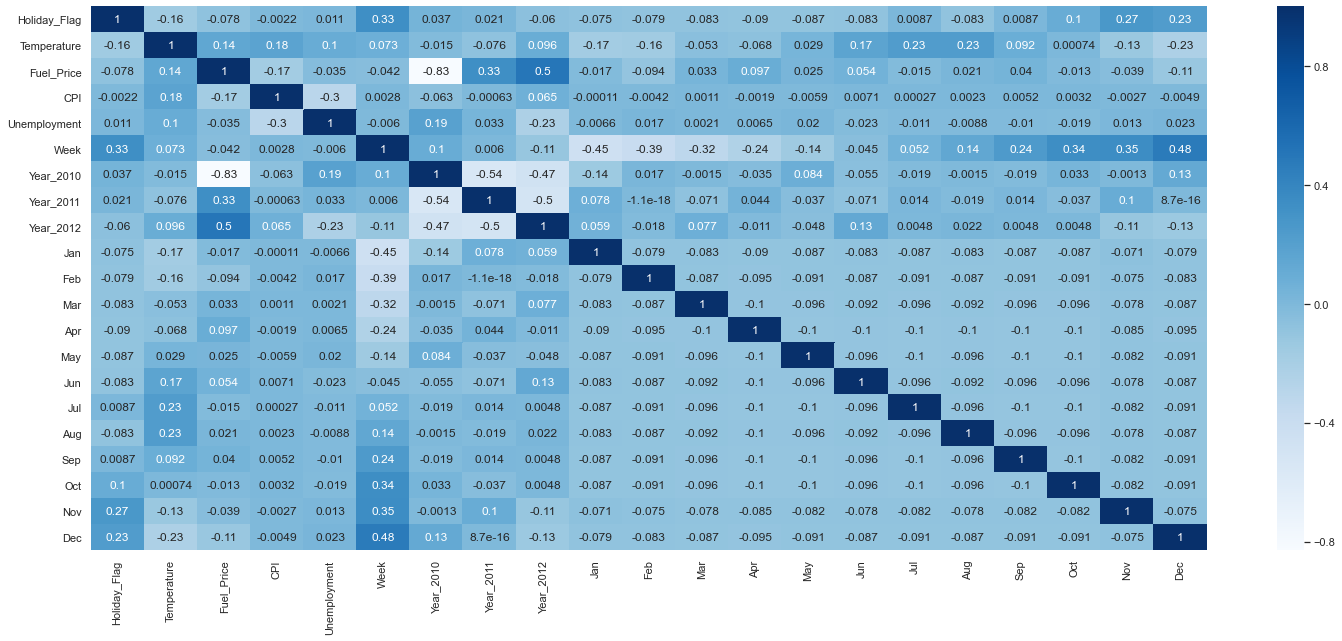

In [85]:
name=['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Week', 'Year_2010', 'Year_2011', 'Year_2012', 'Jan',
       'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov',
       'Dec']

df_no= df_new[name]
plt.figure(figsize=(25,10))
print('Correlation between various features')
p=sns.heatmap(df_no.corr(), annot=True,cmap ='Blues')

In [86]:
from sklearn.model_selection import train_test_split


X_train1, X_test1, y_train, y_test = train_test_split(X_scaled, y, stratify=df_new['Store'], random_state=123)
names=['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Week', 'Year_2010', 'Year_2011', 'Year_2012', 'Jan',
       'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov',
       'Dec']
print(X_train1.shape)
print(y_train.shape)
print(X_test1.shape)
df1 = pd.DataFrame(X_train1, columns=names)
df2 = pd.DataFrame(X_test1, columns=names)
df1 = df1.drop('Store',axis=1)
df2 = df2.drop('Store',axis=1)
X_train = np.array(df1)
X_test = np.array(df2)
X_train.shape


(4826, 22)
(4826, 1)
(1609, 22)


(4826, 21)

In [87]:
#new_df=pd.DataFrame(data=X_train)
#new_df
#a_del = np.delete(X_train,0,axis=1)
#print(X_train.shape)
#print(a_del)
#X_test.shape


In [88]:
#from sklearn import preprocessing
#import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
#scaler = preprocessing.StandardScaler().fit(X_train)
#X_train_scaled=scaler.transform(X_train)
#X_test_scaled=scaler.transform(X_test)


In [89]:
#dummy = pd.get_dummies(X_train['Month'])
#dummy1 =pd.get_dummies(X_train['Year'])
#X_train = pd.concat([X_train, dummy, dummy1],axis=1)
#X_train.head()

In [90]:
#dummy2 = pd.get_dummies(X_test['Month'])
#dummy3 = pd.get_dummies(X_test['Year'])
#X_test = pd.concat([X_test, dummy2, dummy3],axis=1)
#X_test.head()

In [91]:
#Multivariable Linear Regression

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score



In [93]:
model1 = LinearRegression()  
model1.fit(X_train, y_train)
model1.coef_
#coeff_df = pd.DataFrame(model1.coef_.transpose(), X.columns, columns=['Coefficient'])

#coeff_df
#pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":regressor.coef_[0]})

array([[-4.85936611e+01, -1.64019966e+04,  5.69440242e+04,
        -4.89783992e+04, -8.85879399e+04, -4.72441965e+03,
         1.73463609e+18,  1.76704791e+18,  1.68445799e+18,
        -2.21509323e+18, -2.31445903e+18, -2.40819949e+18,
        -2.58122024e+18, -2.49694825e+18, -2.40819949e+18,
        -2.49694825e+18, -2.40819949e+18, -2.49694825e+18,
        -2.49694825e+18, -2.10930724e+18, -2.31445903e+18]])

In [94]:
print('\nIntercept of model1 is:',model1.intercept_)


Intercept of model1 is: [1053654.6595317]


In [95]:
y_pred = model1.predict(X_test)
train_scorelr = model1.score(X_train, y_train)
test_scorelr = model1.score(X_test, y_test)
print('Train Scorelr: ', model1.score(X_train, y_train))  
print('Test Scorelr: ', model1.score(X_test, y_test))  

Train Scorelr:  0.04236330006839828
Test Scorelr:  0.020504881454507684


In [96]:
accuracy_lr = model1.score(X_test,y_test)
print(accuracy_lr*100,'%')

2.0504881454507684 %


In [97]:
#The performance of the model can be evaluated by finding the root mean squared error of the model.


In [98]:
def mean_absolute_percentage_error(y_pred,y_test): 
    return ( abs((y_test - y_pred)/ y_test ).mean()) * 100

In [99]:

from sklearn.metrics import r2_score
#from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Error lr:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error lr:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error lr:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:',r2_score(y_test, y_pred))


Mean Absolute Error lr: 465415.87912383635
Mean Squared Error lr: 304780251583.68146
Root Mean Squared Error lr: 552069.064142958
r2_score: 0.020504881454507684


In [100]:

Mean_absolute_percentage_error_lr = mean_absolute_percentage_error( y_pred,y_test)  

print('Mean Absolute Percentage Error lr:', Mean_absolute_percentage_error_lr)

Mean Absolute Percentage Error lr: Weekly_Sales    66.621583
dtype: float64


In [101]:
from sklearn.model_selection import cross_val_score
# storing the ten scores in an object called mse
mse= cross_val_score(model1,X, y,scoring='neg_mean_squared_error',cv=2)
# taking the mean of mse for using as an indicator of how good the model is
mse.mean()

-897342300484.155

In [102]:

# Saving an array containing all the coefficients
model1_coeffs = model1.coef_[0]
model1_coeffs

array([-4.85936611e+01, -1.64019966e+04,  5.69440242e+04, -4.89783992e+04,
       -8.85879399e+04, -4.72441965e+03,  1.73463609e+18,  1.76704791e+18,
        1.68445799e+18, -2.21509323e+18, -2.31445903e+18, -2.40819949e+18,
       -2.58122024e+18, -2.49694825e+18, -2.40819949e+18, -2.49694825e+18,
       -2.40819949e+18, -2.49694825e+18, -2.49694825e+18, -2.10930724e+18,
       -2.31445903e+18])

In [103]:
feature_names = df_new.drop(['Weekly_Sales','Year','Month'],axis=1).columns
feature_names

Index(['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Week', 'Year_2010', 'Year_2011', 'Year_2012', 'Jan',
       'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov',
       'Dec'],
      dtype='object')

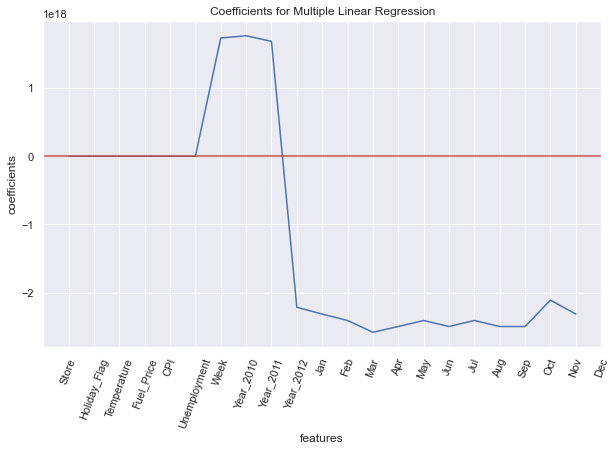

In [104]:
plt.figure(figsize=(10,6))
plt.plot(range(len(model1_coeffs)),model1_coeffs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=70)
plt.title("Coefficients for Multiple Linear Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [105]:
#Unemployment,month,Holiday Flag,Year have a considerable impact on the sale.

In [106]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=80, random_state=0)

In [107]:

model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
y_pred = y_pred.reshape(1609,1)


In [108]:
train_scorerf = model2.score(X_train, y_train)
test_scorerf = model2.score(X_test, y_test)                            
print('Train Scorerf: ', model2.score(X_train, y_train))  
print('Test Scorerf: ', model2.score(X_test, y_test))  


Train Scorerf:  0.7704466401788206
Test Scorerf:  0.10456934759934422


In [109]:

print('Mean Absolute Error rf:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error rf:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error rf:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score rf:',r2_score(y_test, y_pred))

Mean Absolute Error rf: 384597.6056219302
Mean Squared Error rf: 278622705052.0382
Root Mean Squared Error rf: 527847.2364728627
r2_score rf: 0.10456934759934422


In [110]:
Mean_absolute_percentage_error_rf = mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error lr:', Mean_absolute_percentage_error_rf)

Mean Absolute Percentage Error lr: Weekly_Sales    39.119475
dtype: float64


In [111]:
mse_rf= cross_val_score(model2,X,y,scoring='neg_mean_squared_error',cv=2)
# taking the mean of mse for using as an indicator of how good the model is
mse_rf.mean()

-752634479915.8384

In [112]:
accuracy_rf = model2.score(X_test,y_test)
print(accuracy_rf*100,'%')

10.456934759934422 %


In [113]:
#Naive Bayes

In [114]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()

In [115]:
#X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_scaled, y, test_size=.3, random_state=1)

X_train_nb=X_train.astype(int)
y_train_nb=y_train.astype(int)
X_test_nb=X_test.astype(int)
y_test_nb=y_test.astype(int)
model3.fit(X_train_nb,y_train_nb)


y_pred_nb = model3.predict(X_test_nb)
y_pred_nb = y_pred_nb.reshape(1609,1)
X_train_nb.shape

(4826, 21)

In [116]:
#accuracy_nb = accuracy_score(y_test_nb , y_pred_nb)
#print(accuracy_nb*100,'%')

In [117]:
train_scorenb = model3.score(X_train_nb, y_train_nb)
test_scorenb = model3.score(X_test_nb, y_test_nb)                            
print('Train Scorenb: ', model3.score(X_train_nb, y_train_nb))  
print('Test Scorenb: ', model3.score(X_test_nb, y_test_nb))  


Train Scorenb:  0.17757977621218402
Test Scorenb:  0.0


In [118]:
print('Mean Absolute Error nb:', metrics.mean_absolute_error(y_test_nb, y_pred_nb))
print('Mean Squared Error nb:', metrics.mean_squared_error(y_test_nb, y_pred_nb))  
print('Root Mean Squared Error nb:', np.sqrt(metrics.mean_squared_error(y_test_nb, y_pred_nb)))
print('r2_score nb:',r2_score(y_test_nb, y_pred_nb))

Mean Absolute Error nb: 629680.687383468
Mean Squared Error nb: 690449001542.8726
Root Mean Squared Error nb: 830932.6095074574
r2_score nb: -1.2189477267161903


In [119]:
Mean_absolute_percentage_error_nb = mean_absolute_percentage_error(y_test_nb, y_pred_nb)
print('Mean Absolute Percentage Error nb:', Mean_absolute_percentage_error_nb)


Mean Absolute Percentage Error nb: Weekly_Sales    166.912944
dtype: float64


In [120]:
accuracy_nb = model3.score(X_test_nb,y_test_nb)
print(accuracy_nb*100,'%')

0.0 %


In [121]:
mse_nb= cross_val_score(model3,X_train_nb,y_train_nb,scoring='neg_mean_squared_error',cv=2)
# taking the mean of mse for using as an indicator of how good the model is
mse_nb.mean()


-572838998562.5812

In [122]:
#K-Nearest Neighbors

In [123]:
from sklearn.neighbors import KNeighborsRegressor
model4 = KNeighborsRegressor()
model4.fit(X_train,y_train)
y_pred = model4.predict(X_test)
y_pred


array([[1221857.492],
       [1151956.694],
       [1777076.686],
       ...,
       [1864890.168],
       [ 766032.958],
       [1025636.772]])

In [124]:
train_scoreknn = model4.score(X_train, y_train)
test_scoreknn = model4.score(X_test, y_test)                            
print('Train Scoreknn: ', model4.score(X_train, y_train))  
print('Test Scoreknn: ', model4.score(X_test, y_test))  


Train Scoreknn:  0.23751992823631018
Test Scoreknn:  -0.142813961445573


In [125]:
print('Mean Absolute Error knn:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error knn:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error knn:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score knn:',r2_score(y_test, y_pred))

Mean Absolute Error knn: 498219.1504052207
Mean Squared Error knn: 355598634529.13007
Root Mean Squared Error knn: 596320.9157233462
r2_score knn: -0.142813961445573


In [126]:
Mean_absolute_percentage_error_knn = mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error knn:', Mean_absolute_percentage_error_knn)

Mean Absolute Percentage Error knn: Weekly_Sales    49.489211
dtype: float64


In [127]:
accuracy_knn = model4.score(X_test,y_test)
print(accuracy_knn*100,'%')

-14.281396144557302 %


In [128]:
mse_knn= cross_val_score(model4,X,y,scoring='neg_mean_squared_error',cv=2)
# taking the mean of mse for using as an indicator of how good the model is
mse_knn.mean()

-916452460160.5187

In [129]:
#Decision tree model

In [130]:
from sklearn.tree import DecisionTreeRegressor
model5 = DecisionTreeRegressor()
model5.fit(X_train,y_train)
y_pred = model5.predict(X_test)
y_pred = y_pred.reshape(1609,1)

In [131]:
train_scoredt = model5.score(X_train, y_train)
test_scoredt = model5.score(X_test, y_test)                            
print('Train Scoredt: ', model5.score(X_train, y_train))  
print('Test Scoredt: ', model5.score(X_test, y_test))  


Train Scoredt:  0.8509135535495694
Test Scoredt:  -0.3331237641867002


In [132]:
print('Mean Absolute Error dt:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error dt:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error dt:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score dt:',r2_score(y_test, y_pred))

Mean Absolute Error dt: 428535.4251574477
Mean Squared Error dt: 414815539708.2115
Root Mean Squared Error dt: 644061.7514712479
r2_score dt: -0.3331237641867002


In [133]:
Mean_absolute_percentage_error_dt = mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error dt:', Mean_absolute_percentage_error_dt)

Mean Absolute Percentage Error dt: Weekly_Sales    51.92477
dtype: float64


In [134]:
accuracy_dt = model5.score(X_test,y_test)
print(accuracy_dt*100,'%')

-33.31237641867002 %


In [135]:
mse_dt= cross_val_score(model5,X,y,scoring='neg_mean_squared_error',cv=2)
# taking the mean of mse for using as an indicator of how good the model is
mse_dt.mean()

-727702887034.7921

In [136]:
#Elastic Net model

In [137]:
from sklearn.linear_model import ElasticNet
model6 = ElasticNet(alpha=1.0, l1_ratio=0.5)
#X_train_en, X_test_en, y_train_en, y_test_en = train_test_split(X_scaled, y, test_size=.3, random_state=1)
model6.fit(X_train,y_train)
y_pred= model6.predict(X_test)
y_pred = y_pred.reshape(1609,1)

In [138]:
train_scoreen = model6.score(X_train, y_train)
test_scoreen = model6.score(X_test, y_test)                            
print('Train Scoreen: ', model6.score(X_train, y_train))  
print('Test Scoreen: ', model6.score(X_test, y_test))  


Train Scoreen:  0.03648768272496883
Test Scoreen:  0.01769818133814216


In [139]:
print('Mean Absolute Error en:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error en:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error en:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score en:',r2_score(y_test, y_pred))

Mean Absolute Error en: 464448.9908775906
Mean Squared Error en: 305653585969.3149
Root Mean Squared Error en: 552859.4631272173
r2_score en: 0.01769818133814216


In [140]:
Mean_absolute_percentage_error_en = mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error en:', Mean_absolute_percentage_error_en)

Mean Absolute Percentage Error en: Weekly_Sales    44.313332
dtype: float64


In [141]:
accuracy_en = model6.score(X_test,y_test)
print(accuracy_en*100,'%')

1.769818133814216 %


In [142]:
mse_en= cross_val_score(model6,X,y,scoring='neg_mean_squared_error',cv=2)
# taking the mean of mse for using as an indicator of how good the model is
mse_en.mean()

-895390726924.519

In [143]:
#SVM model

In [144]:
from sklearn.svm import SVR
model7 = SVR(kernel = 'rbf')
#X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_scaled, y, test_size=.3, random_state=1)
model7.fit(X_train,y_train)
y_pred= model7.predict(X_test)
y_pred = y_pred.reshape(1609,1)

In [145]:
train_scoresvm = model7.score(X_train, y_train)
test_scoresvm = model7.score(X_test, y_test)                            
print('Train Scoresvm: ', model7.score(X_train, y_train))  
print('Test Scoresvm: ', model7.score(X_test, y_test))  


Train Scoresvm:  -0.02247342485168846
Test Scoresvm:  -0.019015893820313323


In [146]:
print('Mean Absolute Error svm:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error svm:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error svm:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score svm:',r2_score(y_test, y_pred))

Mean Absolute Error svm: 458203.76449544984
Mean Squared Error svm: 317077558229.7101
Root Mean Squared Error svm: 563096.4022525008
r2_score svm: -0.019015893820313323


In [147]:
Mean_absolute_percentage_error_svm = mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error svm:', Mean_absolute_percentage_error_svm)

Mean Absolute Percentage Error svm: Weekly_Sales    47.530174
dtype: float64


In [148]:
accuracy_svm = model7.score(X_test,y_test)
print(accuracy_svm*100,'%')

-1.9015893820313323 %


In [149]:
mse_svm= cross_val_score(model7,X,y,scoring='neg_mean_squared_error',cv=2)
# taking the mean of mse for using as an indicator of how good the model is
mse_svm.mean()

-912126697686.5989

In [150]:
#XGB model

In [151]:
from xgboost import XGBRegressor
model8 = XGBRegressor()
model8.fit(X_train,y_train)
y_pred= model8.predict(X_test)
#predictions = [round(value) for value in y_pred_xgb]
y_pred = y_pred.reshape(1609,1)
#predictions

In [152]:
train_scorexgb = model8.score(X_train, y_train)
test_scorexgb = model8.score(X_test, y_test)                            
print('Train Scorexgb: ', model8.score(X_train, y_train))  
print('Test Scorexgb: ', model8.score(X_test, y_test))  

Train Scorexgb:  0.7147622522129
Test Scorexgb:  0.21155069531215798


In [153]:
print('Mean Absolute Error xgb:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error xgb:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error xgb:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score xgb:',r2_score(y_test, y_pred))

Mean Absolute Error xgb: 371501.0418169282
Mean Squared Error xgb: 245334328771.92883
Root Mean Squared Error xgb: 495312.3547539763
r2_score xgb: 0.21155069531215798


In [154]:
Mean_absolute_percentage_error_xgb = mean_absolute_percentage_error(y_test, y_pred) 
print('Mean Absolute Percentage Error xgb:', Mean_absolute_percentage_error_xgb)

Mean Absolute Percentage Error xgb: Weekly_Sales    37.580655
dtype: float64


In [155]:
accuracy_xgb = model8.score(X_test,y_test)
print(accuracy_xgb*100,'%')

21.155069531215798 %


In [156]:
mse_xgb= cross_val_score(model8,X_train,y_train,scoring='neg_mean_squared_error',cv=2)
# taking the mean of mse for using as an indicator of how good the model is
mse_xgb.mean()

-291949994838.26886

In [157]:
#Comparison of the models:

In [158]:
myLabels = [ 'Linear Regression','Random Forest', 'Naive Bayes', 'K-Nearest Neighbors',
            'Decision tree', 'Elastic Net', 'SVM', 'XGB']
score_test= [test_scorelr,test_scorerf,test_scorenb,test_scoreknn,test_scoredt,test_scoreen,test_scoresvm,test_scorexgb]
score_train= [train_scorelr,train_scorerf,train_scorenb,train_scoreknn,train_scoredt,train_scoreen,train_scoresvm,train_scorexgb]
Accuracy_score = [accuracy_lr,accuracy_rf,accuracy_nb,accuracy_knn,accuracy_dt,accuracy_en,accuracy_svm,accuracy_xgb]
Mean_absolute_percentage_error = [Mean_absolute_percentage_error_lr,Mean_absolute_percentage_error_rf,
                                  Mean_absolute_percentage_error_nb,Mean_absolute_percentage_error_knn,
                                  Mean_absolute_percentage_error_dt,Mean_absolute_percentage_error_en,
                                  Mean_absolute_percentage_error_svm,Mean_absolute_percentage_error_xgb]
score_tab_acc = pd.DataFrame(list(zip(myLabels, Accuracy_score)), 
               columns =['Algorithm', 'Model accuracy score']) 

score_tab = pd.DataFrame(list(zip(myLabels, score_train, score_test)), 
               columns =['Algorithm', 'train score', ' test score' ]) 
score_tab_percent = pd.DataFrame(list(zip(myLabels, Mean_absolute_percentage_error)), 
               columns =['Algorithm', 'Model percentage error score' ]) 
print(score_tab_acc)
print(score_tab)
print(score_tab_percent)

             Algorithm  Model accuracy score
0    Linear Regression              0.020505
1        Random Forest              0.104569
2          Naive Bayes              0.000000
3  K-Nearest Neighbors             -0.142814
4        Decision tree             -0.333124
5          Elastic Net              0.017698
6                  SVM             -0.019016
7                  XGB              0.211551
             Algorithm  train score   test score
0    Linear Regression     0.042363     0.020505
1        Random Forest     0.770447     0.104569
2          Naive Bayes     0.177580     0.000000
3  K-Nearest Neighbors     0.237520    -0.142814
4        Decision tree     0.850914    -0.333124
5          Elastic Net     0.036488     0.017698
6                  SVM    -0.022473    -0.019016
7                  XGB     0.714762     0.211551
             Algorithm               Model percentage error score
0    Linear Regression   Weekly_Sales    66.621583
dtype: float64
1        Random Forest

([<matplotlib.axis.XTick at 0x126149490>,
 [Text(0, 0, 'Linear Regression'),
  Text(0, 0, 'Random Forest'),
  Text(0, 0, 'Naive Bayes'),
  Text(0, 0, 'K-Nearest Neighbors'),
  Text(0, 0, 'Decision tree'),
  Text(0, 0, 'Elastic Net'),
  Text(0, 0, 'SVM'),
  Text(0, 0, 'XGB')])

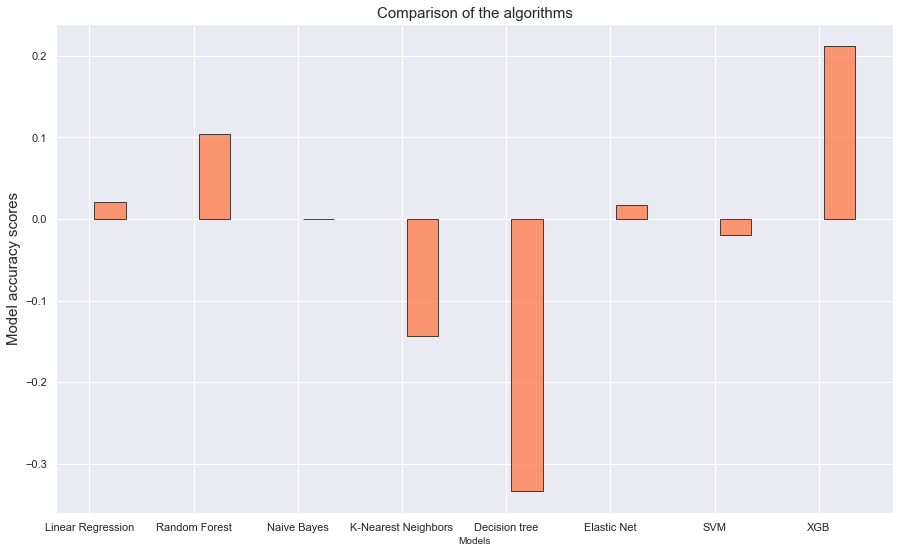

In [159]:
#plotting the accuracy scores:


index=[1,2,3,4,5,6,7,8]
index_acc=[1.2,2.2,3.2,4.2,5.2,6.2,7.2,8.2]
plt.figure(figsize=(15,9))
plt.xlabel('Models',fontsize=10)
plt.ylabel ('Model accuracy scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
#patterns = [ "/"]
_=plt.bar(index_acc,Accuracy_score,color='coral',alpha=0.8,label='Accuracy score',edgecolor='k',width=0.3)
plt.xticks([1, 2,3,4,5,6,7,8], myLabels)


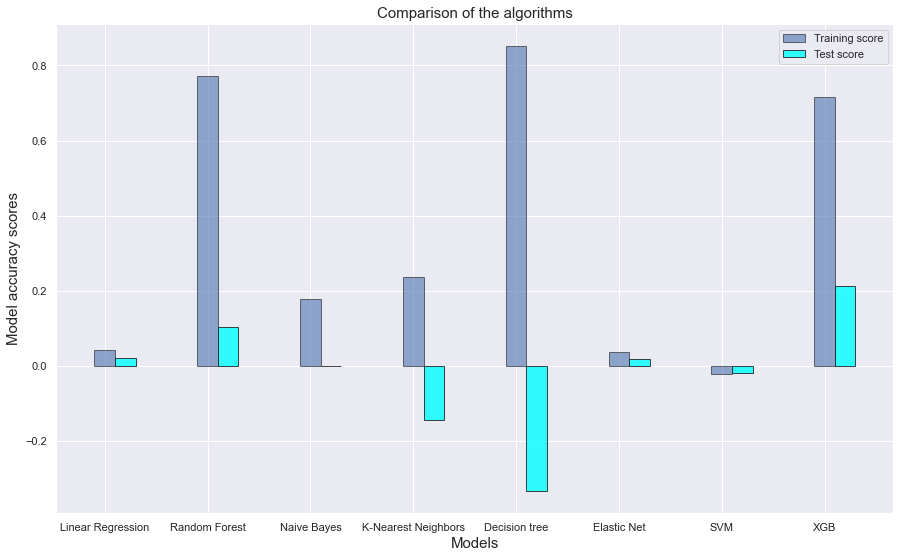

In [160]:
index=[1,2,3,4,5,6,7,8]
index_acc=[1.2,2.2,3.2,4.2,5.2,6.2,7.2,8.2]
plt.figure(figsize=(15,9))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Model accuracy scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
_=plt.bar(index,score_train,color='b',alpha=0.6,label='Training score',edgecolor='k',width=0.2)
_=plt.bar(index_acc,score_test,color='cyan',alpha=0.8,label='Test score',edgecolor='k',width=0.2)
plt.xticks([1, 2,3,4,5,6,7,8], myLabels)
plt.legend()
plt.show()

([<matplotlib.axis.XTick at 0x12615cfd0>,
 [Text(0, 0, 'Linear Regression'),
  Text(0, 0, 'Random Forest'),
  Text(0, 0, 'Naive Bayes'),
  Text(0, 0, 'K-Nearest Neighbors'),
  Text(0, 0, 'Decision tree'),
  Text(0, 0, 'Elastic Net'),
  Text(0, 0, 'SVM'),
  Text(0, 0, 'XGB')])

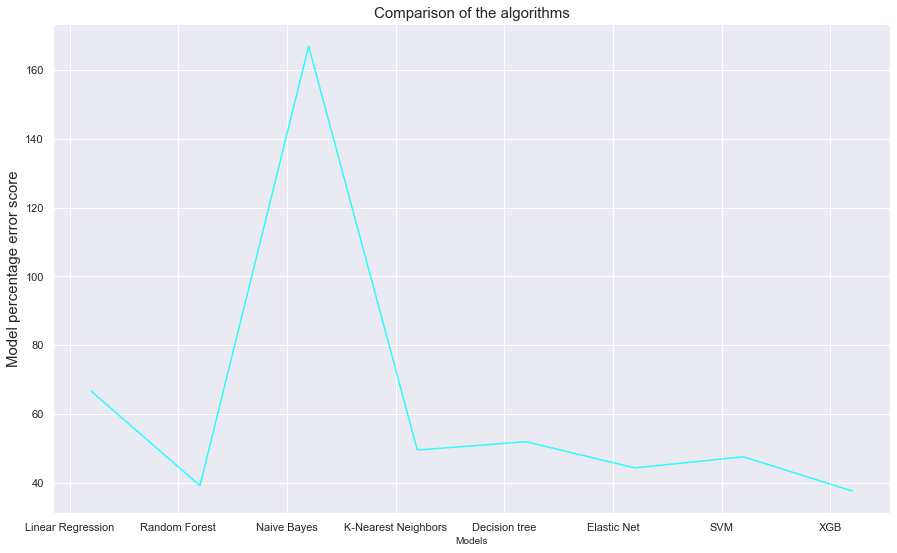

In [161]:
index=[1,2,3,4,5,6,7,8]
index_acc=[1.2,2.2,3.2,4.2,5.2,6.2,7.2,8.2]
plt.figure(figsize=(15,9))
plt.xlabel('Models',fontsize=10)
plt.ylabel ('Model percentage error score',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
#patterns = [ "/"]
_=plt.plot(index_acc,Mean_absolute_percentage_error,color='cyan',alpha=0.8,label='Accuracy score')
plt.xticks([1, 2,3,4,5,6,7,8], myLabels)


In [162]:
#Applying Grid search CV for hyperparameter Tuning for Random Forest

In [163]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
#Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [70,80, 90, 100, 110],
    'max_features': [6, 7],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [164]:
grid_search_rf.fit(X,y)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 24.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True],
              

In [165]:
print("Best Score:" + str(grid_search_rf.best_score_))
print("Best Parameters: " + str(grid_search_rf.best_params_))

Best Score:-19.397483734967985
Best Parameters: {'bootstrap': True, 'max_depth': 70, 'max_features': 7, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [166]:
#Fitting the Random forest model with the optimal hyperparameters

In [167]:
rf = RandomForestRegressor(bootstrap=True, criterion='mse',
            max_depth=70, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))  

Mean Squared Error: 259657798622.43307


In [168]:
#Feature importances:
features=['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Week', 'Year_2010', 'Year_2011', 'Year_2012', 'Jan',
       'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov',
       'Dec']

#features = X
importances = list(rf.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(features,imp)),columns =['Features', 'Importance scores']) 
tab = tab.sort_values(by=['Importance scores'], ascending=False)
print(tab)


        Features  Importance scores
20           Dec           0.328235
19           Nov           0.220242
18           Oct           0.159615
17           Sep           0.110300
16           Aug           0.096150
15           Jul           0.011622
14           Jun           0.010273
13           May           0.009287
12           Apr           0.008143
11           Mar           0.007980
10           Feb           0.004556
9            Jan           0.004043
8      Year_2012           0.003661
7      Year_2011           0.003526
6      Year_2010           0.003511
5           Week           0.003491
4   Unemployment           0.003399
3            CPI           0.003276
2     Fuel_Price           0.003145
1    Temperature           0.002869
0   Holiday_Flag           0.002678


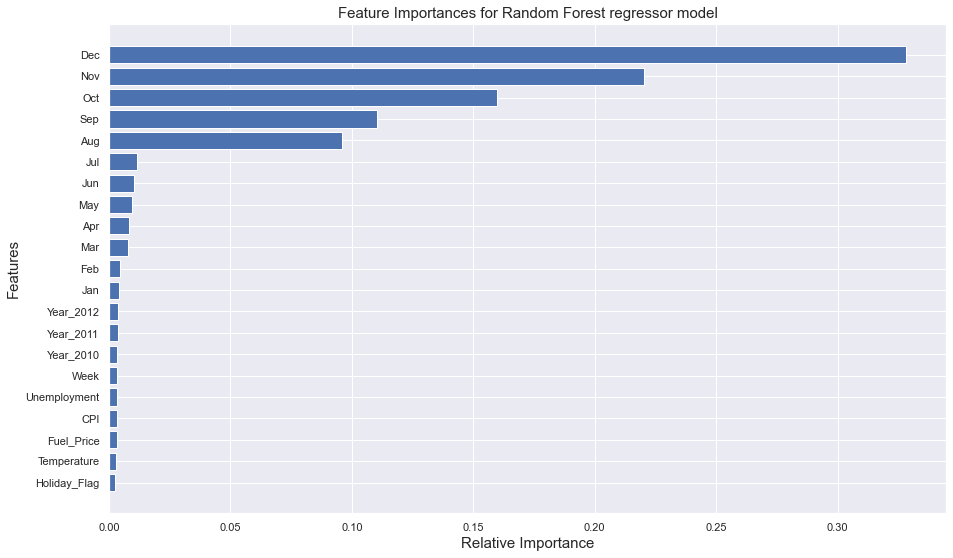

In [169]:
#Visual comparison:
plt.figure(figsize=(15,9))
#indices = np.argsort(importances)
index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
_=plt.barh(index,imp, align='center',color='b')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Random Forest regressor model',fontsize=15)
plt.show()

In [170]:
#Applying Grid search CV for hyperparameter Tuning for XGB

In [171]:
#cv=2
xgb1 = XGBRegressor()
parameters = { 
              'objective':['reg:linear'],
              'learning_rate': [0.045,0.05,0.06], 
              'max_depth': [2,3,4,5,6,7,8],
               'min_child_weight': [1,2,3,4,5,6],
                      'silent': [1,2],
                      'subsample': [0.5,0.55,0.6,0.7,0.8,0.9],
                      'colsample_bytree': [0.7,0.8,0.85,1],
                      'n_estimators': [200,300,400,650,750,800,1000]}

xgb_grid = GridSearchCV(xgb1,parameters,
                            scoring='neg_mean_squared_error', #this line can be commented to use XGB's default metric
                            cv =2,
                            n_jobs =2,
                            verbose=True)


xgb_grid.fit(X_train,y_train)

Fitting 2 folds for each of 42336 candidates, totalling 84672 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   16.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  4.3min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  7.7min
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed: 12.7min
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed: 21.1min
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed: 31.2min
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed: 45.8min
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed: 62.3min
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed: 79.7min
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed: 108.5min
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed: 133.1min
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed: 142.2min
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed: 156.5min
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed: 17

[15:05:23] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:05:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:05:24] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constrain...
             param_grid={'colsample_bytree': [0.7, 0.8, 0.85, 1],
                         'learning_rate': [0.045, 0.05, 0.06],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_child_weight': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [200, 300, 400, 650, 750, 800, 10

In [172]:
print("Best Score:" + str(xgb_grid.best_score_))
print("Best Parameters: " + str(xgb_grid.best_params_))

Best Score:-243523369549.7038
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 300, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.9}


In [173]:
#cv=3
xgb2 = XGBRegressor()
parameters = { 
              'objective':['reg:linear'],
              'learning_rate': [0.045,0.05,0.06], 
              'max_depth': [2,3,4,5,6,7],
               'min_child_weight': [1,2,3,4,5],
                      'silent': [1],
                      'subsample': [0.5,0.55,0.6,0.7,0.8],
                      'colsample_bytree': [0.7,0.8,0.85],
                      'n_estimators': [200,400,650,750,800,1000]}

xgb_grid = GridSearchCV(xgb2,parameters,
                            scoring='neg_mean_squared_error', #this line can be commented to use XGB's default metric
                            cv = 3,
                            n_jobs = 3,
                            verbose=True)


xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 8100 candidates, totalling 24300 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   20.4s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  1.7min
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:  3.8min
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:  8.0min
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed: 14.6min
[Parallel(n_jobs=3)]: Done 1794 tasks      | elapsed: 25.2min
[Parallel(n_jobs=3)]: Done 2444 tasks      | elapsed: 40.9min
[Parallel(n_jobs=3)]: Done 3194 tasks      | elapsed: 53.1min
[Parallel(n_jobs=3)]: Done 4044 tasks      | elapsed: 64.2min
[Parallel(n_jobs=3)]: Done 4994 tasks      | elapsed: 81.7min
[Parallel(n_jobs=3)]: Done 6044 tasks      | elapsed: 100.7min
[Parallel(n_jobs=3)]: Done 7194 tasks      | elapsed: 119.7min
[Parallel(n_jobs=3)]: Done 8444 tasks      | elapsed: 144.9min
[Parallel(n_jobs=3)]: Done 9794 tasks      | elapsed: 167.0min
[Parallel(n_jobs=3)]: Done 11244 tasks      | elapsed: 19

[22:41:59] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[22:41:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:42:00] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constrain...
             param_grid={'colsample_bytree': [0.7, 0.8, 0.85],
                         'learning_rate': [0.045, 0.05, 0.06],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [200, 400, 650, 750, 800, 1000],
         

In [174]:
print("Best Score:" + str(xgb_grid.best_score_))
print("Best Parameters: " + str(xgb_grid.best_params_))

Best Score:-241582959726.213
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.045, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 400, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.8}


In [175]:
#cv=4
xgb3 = XGBRegressor()
parameters = { 
              'objective':['reg:linear'],
              'learning_rate': [0.045,0.05,0.06], 
              'max_depth': [2,3,4,5,6],
               'min_child_weight': [1,2,3,4,5],
                      'silent': [1],
                      'subsample': [0.5,0.55,0.6,0.8],
                      'colsample_bytree': [0.7,0.8,0.85],
                      'n_estimators': [200,300,400,650,750,800,1000]}

xgb_grid = GridSearchCV(xgb3,parameters,
                            scoring='neg_mean_squared_error', #this line can be commented to use XGB's default metric
                            cv = 4,
                            n_jobs = 4,
                            verbose=True)


xgb_grid.fit(X_train,y_train)

Fitting 4 folds for each of 6300 candidates, totalling 25200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.7min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  7.1min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 12.4min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 20.3min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 31.9min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed: 42.0min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed: 51.3min
[Parallel(n_jobs=4)]: Done 4992 tasks      | elapsed: 65.4min
[Parallel(n_jobs=4)]: Done 6042 tasks      | elapsed: 81.0min
[Parallel(n_jobs=4)]: Done 7192 tasks      | elapsed: 94.4min
[Parallel(n_jobs=4)]: Done 8442 tasks      | elapsed: 115.9min
[Parallel(n_jobs=4)]: Done 9792 tasks      | elapsed: 130.9min
[Parallel(n_jobs=4)]: Done 11242 tasks      | elapsed: 158.

[04:55:05] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[04:55:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:55:06] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constrain...
             param_grid={'colsample_bytree': [0.7, 0.8, 0.85],
                         'learning_rate': [0.045, 0.05, 0.06],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [200, 300, 400, 650, 750, 800, 1000],
       

In [176]:
print("Best Score:" + str(xgb_grid.best_score_))
print("Best Parameters: " + str(xgb_grid.best_params_))

Best Score:-237827614633.66327
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.045, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 400, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.8}


In [177]:
#cv=5
xgb4 = XGBRegressor()
parameters = { 
              'objective':['reg:linear'],
              'learning_rate': [0.03,0.045,0.05,0.06], 
              'max_depth': [2,3,4,5,6],
               'min_child_weight': [1,2,3,4,5,6],
                      'silent': [1,2],
                      'subsample': [0.5,0.55,0.6,0.7,0.8],
                      'colsample_bytree': [0.7,0.8,0.85],
                      'n_estimators': [200,300,400,650,750,800]}

xgb_grid = GridSearchCV(xgb4,parameters,
                            scoring='neg_mean_squared_error', #this line can be commented to use XGB's default metric
                            cv = 5,
                            n_jobs = 5,
                            verbose=True)


xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 21600 candidates, totalling 108000 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    9.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  3.0min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:  5.8min
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:  9.5min
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed: 13.9min
[Parallel(n_jobs=5)]: Done 2440 tasks      | elapsed: 20.3min
[Parallel(n_jobs=5)]: Done 3190 tasks      | elapsed: 27.6min
[Parallel(n_jobs=5)]: Done 4040 tasks      | elapsed: 37.2min
[Parallel(n_jobs=5)]: Done 4990 tasks      | elapsed: 49.4min
[Parallel(n_jobs=5)]: Done 6040 tasks      | elapsed: 64.8min
[Parallel(n_jobs=5)]: Done 7190 tasks      | elapsed: 82.9min
[Parallel(n_jobs=5)]: Done 8440 tasks      | elapsed: 105.1min
[Parallel(n_jobs=5)]: Done 9790 tasks      | elapsed: 121.4min
[Parallel(n_jobs=5)]: Done 11240 tasks      | elapsed: 133.

[06:02:12] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[06:02:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:02:13] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constrain...
             param_grid={'colsample_bytree': [0.7, 0.8, 0.85],
                         'learning_rate': [0.03, 0.045, 0.05, 0.06],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_child_weight': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [200, 300, 400, 650, 750, 800],
    

In [183]:
print("Best Score:" + str(xgb_grid.best_score_))
print("Best Parameters: " + str(xgb_grid.best_params_))

Best Score:-234263678587.43375
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 200, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.8}


In [184]:
#cv=6
xgb5 = XGBRegressor()
parameters = { 
              'objective':['reg:linear'],
              'learning_rate': [0.03,0.045,0.05,0.06], 
              'max_depth': [2,3,4,5,6],
               'min_child_weight': [1,2,3,4,5,6],
                      'silent': [1,2],
                      'subsample': [0.5,0.55,0.6,0.7,0.8],
                      'colsample_bytree': [0.7,0.8,0.85],
                      'n_estimators': [200,300,400,650,750,800]}

xgb_grid = GridSearchCV(xgb5,parameters,
                            scoring='neg_mean_squared_error', #this line can be commented to use XGB's default metric
                            cv = 6,
                            n_jobs = 6,
                            verbose=True)


xgb_grid.fit(X_train,y_train)

Fitting 6 folds for each of 21600 candidates, totalling 129600 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   23.5s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  4.1min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  7.5min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 11.2min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 16.4min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 21.8min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 29.8min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 38.6min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 50.5min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 65.0min
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed: 83.0min
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed: 103.4min
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed: 130.5min
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed: 154.

[00:14:00] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[00:14:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:14:02] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constrain...
             param_grid={'colsample_bytree': [0.7, 0.8, 0.85],
                         'learning_rate': [0.03, 0.045, 0.05, 0.06],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_child_weight': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [200, 300, 400, 650, 750, 800],
    

In [185]:
print("Best Score:" + str(xgb_grid.best_score_))
print("Best Parameters: " + str(xgb_grid.best_params_))

Best Score:-233522978455.13852
Best Parameters: {'colsample_bytree': 0.85, 'learning_rate': 0.03, 'max_depth': 4, 'min_child_weight': 6, 'n_estimators': 650, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.8}


In [179]:
#Fitting the XGB model with the optimal hyperparameters

In [186]:
xgb = XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=0.85, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.03, max_delta_step=None,
                                    max_depth=4, min_child_weight=6,n_estimators=650,
                                    subsample=0.8, silent=1, objective='reg:linear')

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_xgb))  


[13:20:57] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[13:20:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:21:00] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
Mean Squared Error: 217858095216.76456


In [191]:
#Feature importances:
features=['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Week', 'Year_2010', 'Year_2011', 'Year_2012', 'Jan',
       'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'
       ]
#features = X
importances = list(xgb.feature_importances_)
imp_xgb=np.sort(importances)
tab=pd.DataFrame(list(zip(features,imp_xgb)),columns =['Features', 'Importance scores']) 
tab = tab.sort_values(by=['Importance scores'], ascending=False)
print(tab)


        Features  Importance scores
20           Dec           0.105709
19           Nov           0.099204
18           Oct           0.084817
17           Sep           0.083999
16           Aug           0.078874
15           Jul           0.059692
14           Jun           0.051667
13           May           0.044294
12           Apr           0.043002
11           Mar           0.042576
10           Feb           0.037080
9            Jan           0.036478
8      Year_2012           0.031335
7      Year_2011           0.030487
6      Year_2010           0.029883
5           Week           0.029258
4   Unemployment           0.023893
3            CPI           0.023621
2     Fuel_Price           0.022972
1    Temperature           0.022430
0   Holiday_Flag           0.018729


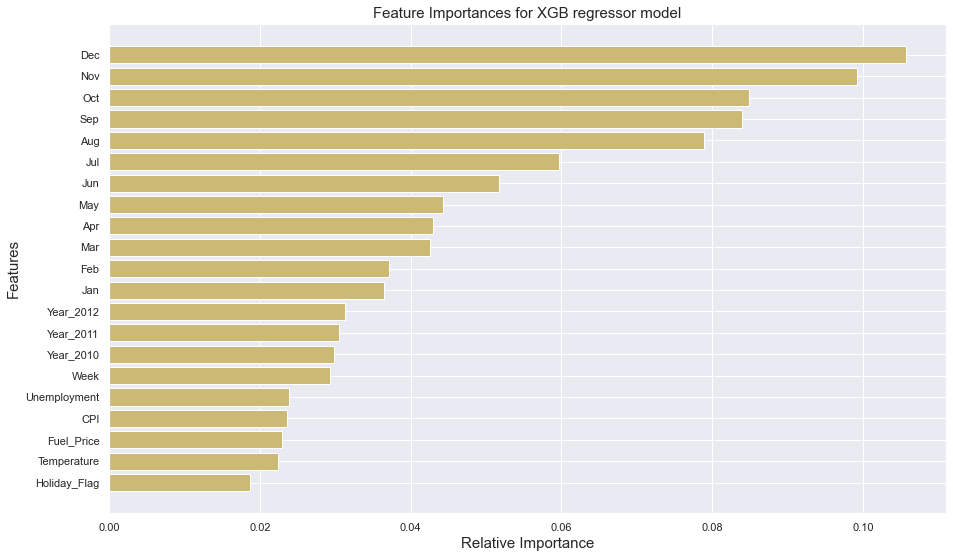

In [189]:
#Visual comparison:
plt.figure(figsize=(15,9))
#indices = np.argsort(importances)
index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
_=plt.barh(index,imp_xgb, align='center',color='y')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for XGB regressor model',fontsize=15)
plt.show()

In [194]:
#Excluding the 'Dec' feature
df3 = df1.drop(['Dec'],axis=1)
df4 = df2.drop(['Dec'],axis=1)
X_train = np.array(df3)
X_test = np.array(df4)
X_train.shape

(4826, 20)

In [195]:
#Fitting the XGB model with the optimal hyperparameters
xgb = XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=0.85, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.03, max_delta_step=None,
                                    max_depth=4, min_child_weight=6,n_estimators=650,
                                    subsample=0.8, silent=1, objective='reg:linear')

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_xgb))  


[15:53:14] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:53:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:53:16] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
Mean Squared Error: 217437878477.5333


In [196]:
#Feature importances:
features=['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Week', 'Year_2010', 'Year_2011', 'Year_2012', 'Jan',
       'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov'
       ]
#features = X
importances = list(xgb.feature_importances_)
imp_xgb=np.sort(importances)
tab=pd.DataFrame(list(zip(features,imp_xgb)),columns =['Features', 'Importance scores']) 
tab = tab.sort_values(by=['Importance scores'], ascending=False)
print(tab)


        Features  Importance scores
19           Nov           0.116828
18           Oct           0.100616
17           Sep           0.087189
16           Aug           0.082671
15           Jul           0.076294
14           Jun           0.058460
13           May           0.046835
12           Apr           0.045011
11           Mar           0.043778
10           Feb           0.042716
9            Jan           0.040505
8      Year_2012           0.035260
7      Year_2011           0.033431
6      Year_2010           0.029640
5           Week           0.028935
4   Unemployment           0.028619
3            CPI           0.028395
2     Fuel_Price           0.026801
1    Temperature           0.024299
0   Holiday_Flag           0.023718


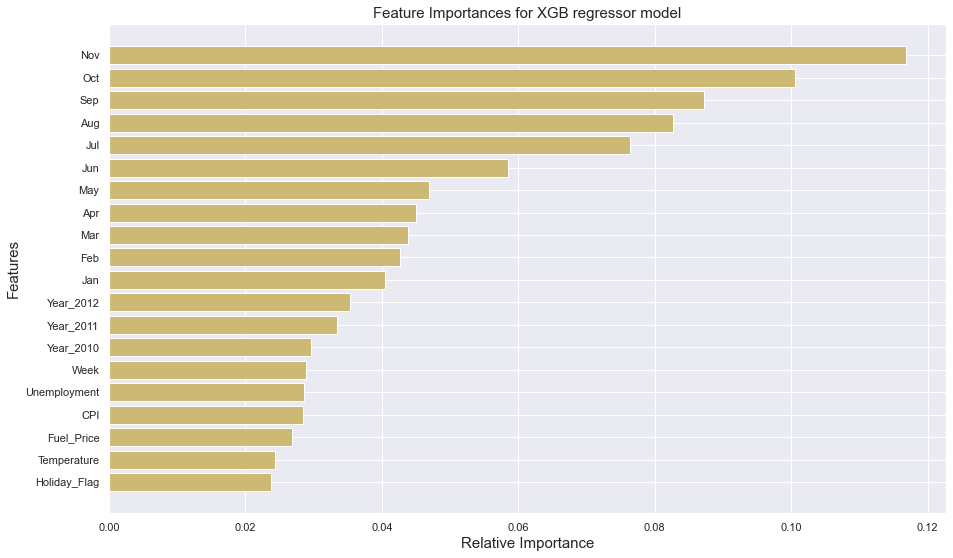

In [198]:
#Visual comparison:
plt.figure(figsize=(15,9))
#indices = np.argsort(importances)
index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
_=plt.barh(index,imp_xgb, align='center',color='y')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for XGB regressor model',fontsize=15)
plt.show()